#**Diabetes Prediction Model** 

#Packages

In [ ]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu" )

#Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Diabetes Dataset/diabetes.csv"

In [ ]:
diabetes = pd.read_csv(path)

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#Data Cleaning

In [ ]:
update_columns = ["Glucose","BloodPressure", "SkinThickness", "Insulin", "BMI"]

for col in update_columns:
    diabetes[col].replace(to_replace = 0,value = diabetes[col].median(),inplace = True)

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [ ]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print("Number of rows:",len(diabetes.index))
#print("Number of rows:",diabetes.shape[0])
print("Number of columns:",diabetes.shape[1])

Number of rows: 768
Number of columns: 9


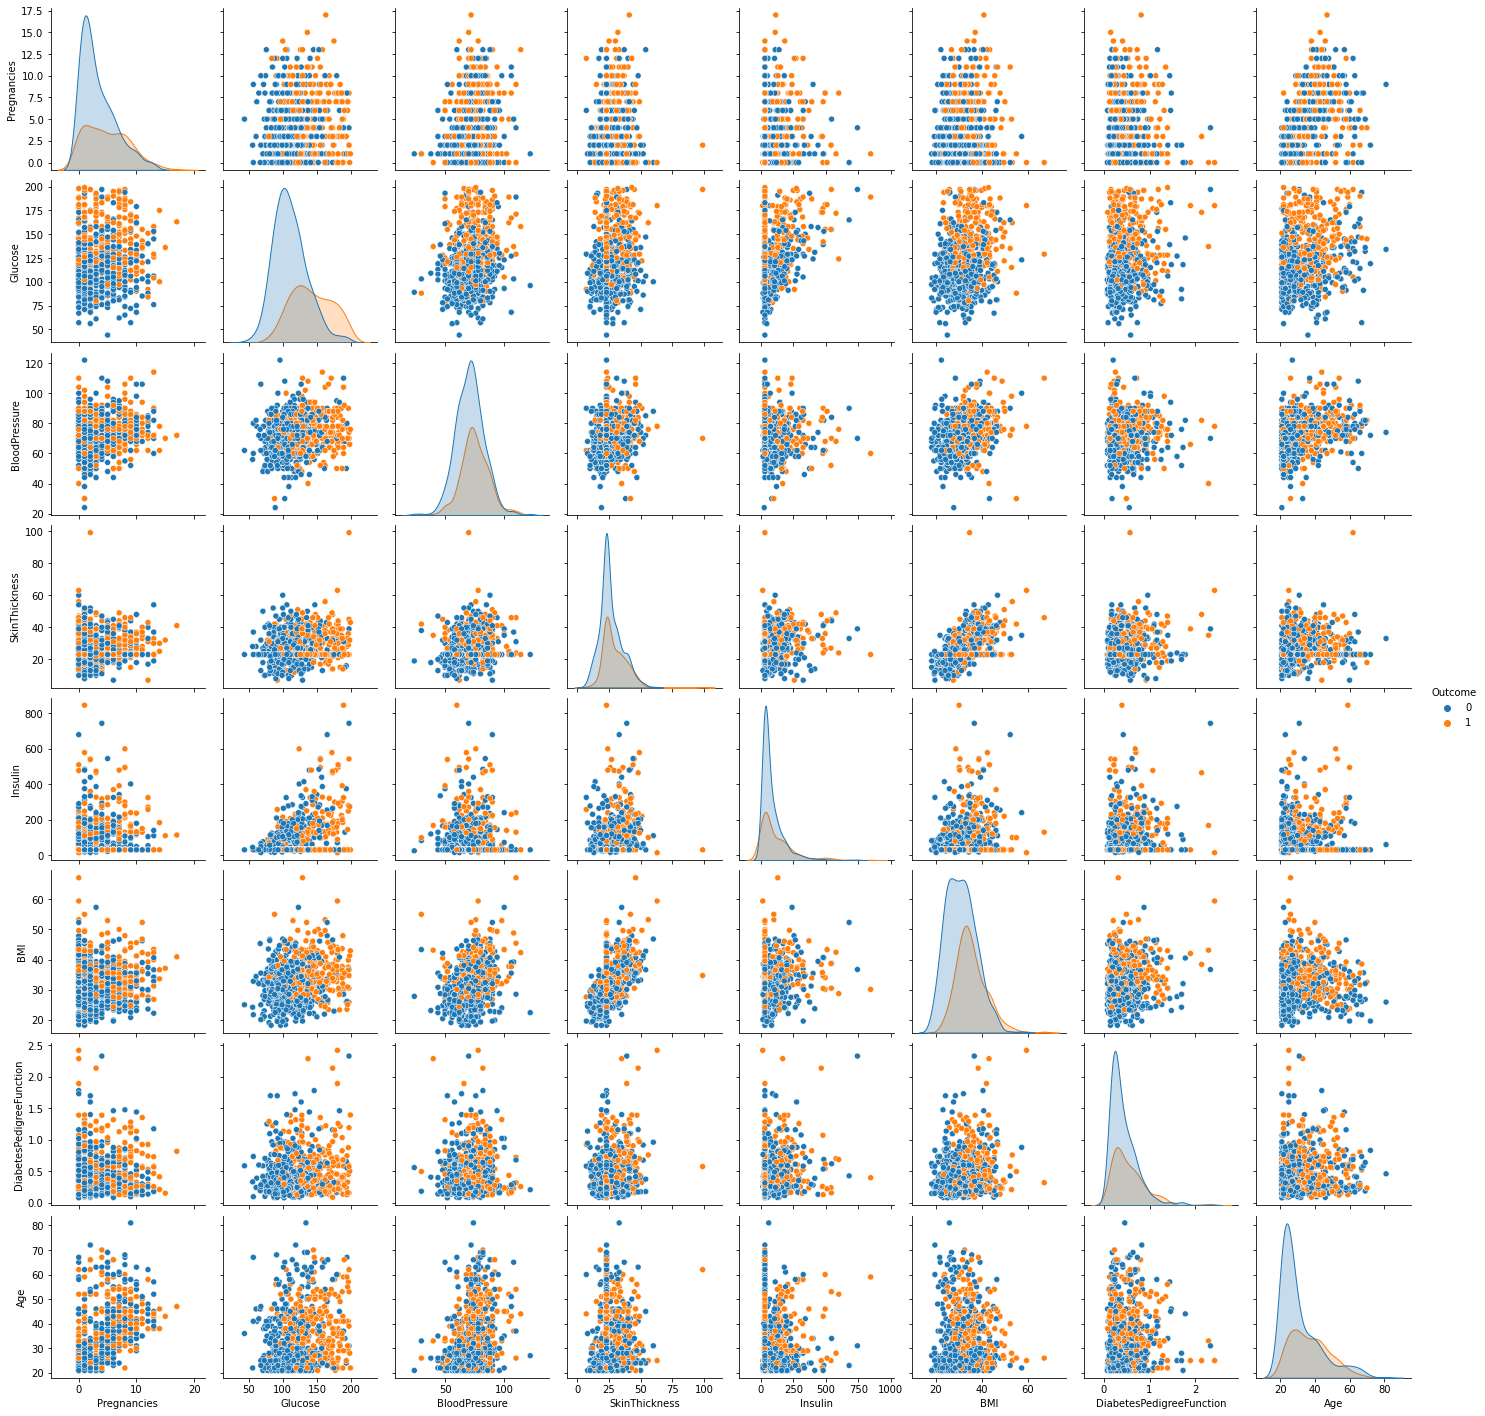

In [ ]:
sns.pairplot(diabetes,hue = "Outcome")
plt.show()

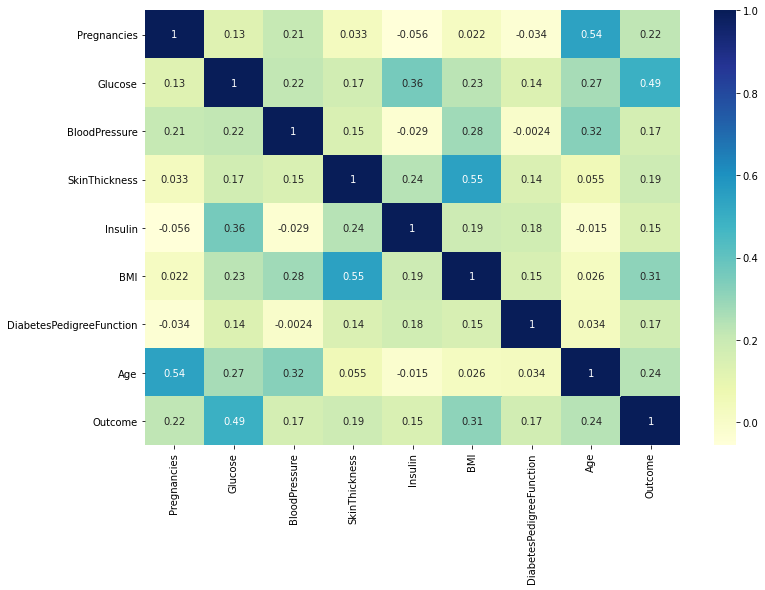

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(diabetes.corr(), cmap = "YlGnBu", annot = True)
plt.show()

In [ ]:
x = diabetes.drop("Outcome",axis = 'columns')
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [ ]:
y = diabetes.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
y.describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.20,random_state = 0,stratify = y)

In [ ]:
print(x_train.shape,x_test.shape)

(614, 8) (154, 8)


In [ ]:
x_train= torch.tensor(x_train.values.astype(np.float32))
x_test= torch.tensor(x_test.values.astype(np.float32))
y_train= torch.tensor(y_train.values.astype(np.float32))
y_test= torch.tensor(y_test.values.astype(np.float32))

In [ ]:
x_train = x_train.to(device)
x_test = x_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

#Model

In [ ]:
class model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(8,8),
            nn.Sigmoid(),
            nn.Linear(8,4),
            nn.Sigmoid(),
            nn.Linear(4,1),
            nn.Sigmoid()
        )

    def forward(self,x):
        return self.net(x)

In [ ]:
class model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(8,4),
            nn.Sigmoid(),
            nn.Linear(4,1),
            nn.Sigmoid()
        )

    def forward(self,x):
        return self.net(x)

In [ ]:
class model3(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(8,4),
            nn.Sigmoid(),
            nn.Linear(4,2),
            nn.Sigmoid(),
            nn.Linear(2,1),
            nn.Sigmoid()
        )

    def forward(self,x):
        return self.net(x)

In [ ]:
def fit(x, y, model, opt, max_epochs = 1000 , loss_fn = nn.MSELoss()):
    loss_epoch = []
    x = x.to(device)
    y = y.to(device)
    for epoch in range(max_epochs):
        
        y_hat = model(x).reshape(-1)
        loss = loss_fn(y_hat,y)

        loss.backward()
        opt.step()
        opt.zero_grad()
        
        loss_epoch.append(loss.item())
    
    plt.plot(loss_epoch)
    plt.title('Loss plot')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

    del x,y
    torch.cuda.empty_cache()

In [ ]:
fn = model2()
print(fn)

model2(
  (net): Sequential(
    (0): Linear(in_features=8, out_features=4, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=4, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [ ]:
fn = fn.to(device)
parameters = fn.parameters()
opt = torch.optim.SGD(parameters,lr=0.1)
loss_fn = nn.MSELoss()
max_epochs = 100000

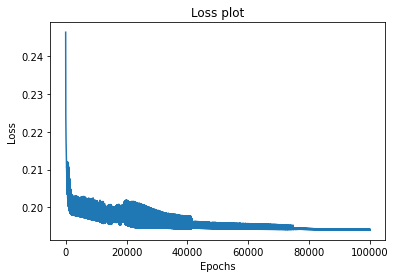

In [ ]:
fit(x_train, y_train, fn, opt, max_epochs, loss_fn)

In [ ]:
print("Predicted:",fn(x_train[0]).item()>0.5 ,"Label:",y_train[0].item())

Predicted: True Label: 1.0


#Evaluation

In [ ]:
def evaluation(input,label,model):
    correct = 0
    total = label.shape[0]

    output = model(input)
    for x,y in zip(output,label):
        if(x<0.5 and y==0):
            correct+=1
        elif(x>=0.5 and y==1):
            correct+=1

    return 100 * correct / total

In [ ]:
def get_binary(input):
    y_pred = fn(input)
    y_pred = y_pred.to("cpu")
    y_pred = y_pred.detach().numpy()
    for i in range(len(y_pred)):
        if(y_pred[i]>=0.5):
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    
    return y_pred

In [ ]:
print("Train accuracy:",evaluation(x_train,y_train,fn))
print("Test accuracy :",evaluation(x_test,y_test,fn))

Train accuracy: 63.68078175895766
Test accuracy : 71.42857142857143


In [ ]:
y_pred= get_binary(x_test)

conf_mat = confusion_matrix( y_pred, y_test.to("cpu").detach().numpy())
y_test = y_test.to(device)

In [ ]:
print(conf_mat)

[[81 34]
 [19 20]]


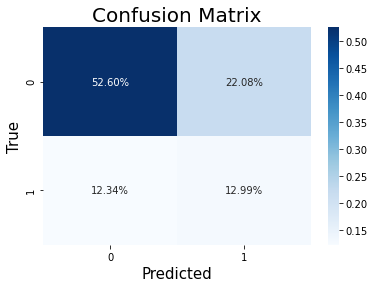

In [ ]:
sns.heatmap(conf_mat/np.sum(conf_mat),annot = True,fmt = ".2%",cmap = "Blues")
plt.title("Confusion Matrix",fontsize = 20)
plt.xlabel("Predicted",fontsize = 15)
plt.ylabel("True",fontsize = 15)
plt.show()